Водопьян А.О. Хабибуллин Р.А. 2019 г. 

# PVT cвойства BlackOil модели нефти по корреляциям Стендинга.

Импорт необходимых модулей

In [1]:
import sys
sys.path.append('../')
import uniflocpy.uPVT.PVT_fluids as PVT
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pylab
import uniflocpy.uPVT.PVT_correlations as PVTcorr
%matplotlib inline

Создание хранилищей свойств и их заполнение

In [2]:
fl = PVT.FluidStanding(rsb_m3m3=50)
p_0 = 5
p_n = 300
dp = 5
p_bar = np.arange(p_0, p_n, dp)
t_C = 150
pb, rs, mu_oil, compr_oil, bo, rho_oil  = [], [], [], [], [], []
z, rho_gas, mu_gas,compr_gas, bg = [], [], [], [], []
rho_wat, mu_wat, compr_wat, bw = [], [], [], []

for p in p_bar:
    fl.calc(p, t_C)
    pb.append(fl.pb_bar)
    rs.append(fl.rs_m3m3)
    mu_oil.append(fl.mu_oil_cP)
    compr_oil.append(fl.compr_oil_1bar)
    bo.append(fl.bo_m3m3)
    rho_oil.append(fl.rho_oil_kgm3)
    z.append(fl.z)
    mu_gas.append(fl.mu_gas_cP)
    compr_gas.append(fl.compr_gas_1bar)
    bg.append(fl.bg_m3m3)
    rho_wat.append(fl.rho_wat_kgm3)
    mu_wat.append(fl.mu_wat_cP)
    compr_wat.append(fl.compr_wat_1bar)
    bw.append(fl.bw_m3m3)
    rho_gas.append(fl.rho_gas_kgm3)

Вспомогательная функция для построения графиков

In [3]:

mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'


def plot3inrow(ys, x, titles, ylabels, subplots):
    for i in range(3):
        plt.subplot(subplots[i])
        plt.ylim(0.9 * np.min(ys[i]), 1.1 * np.max(ys[i]))
        plt.xlim(0, x[0])
        plt.grid(True)
        plt.title(titles[i], color='black', family='fantasy')
        plt.ylabel(ylabels[i], color='black', family='fantasy')
        plt.xlabel('Давление, бар', color='black', family='fantasy')
        plt.plot(p_bar, ys[i], linewidth=3)
    plt.subplots_adjust(left=0.01, right=2.5, top=0.98, bottom=0.04)
    plt.show()


## Давление насыщения, z - фактор, газосодержание

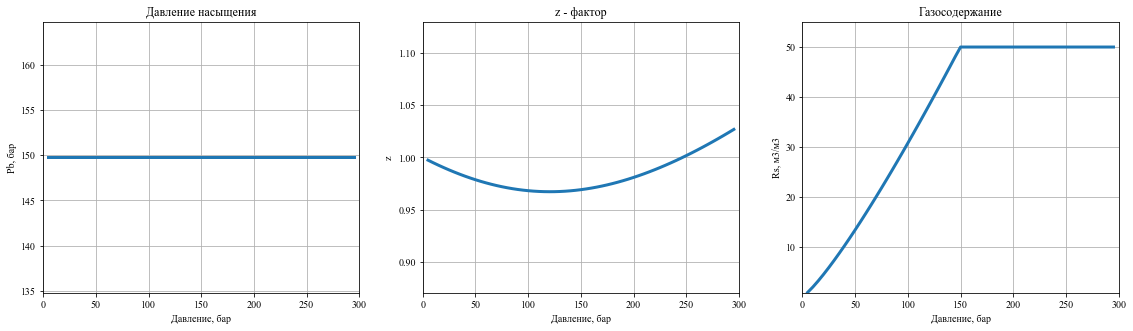

In [4]:
ys = [pb, z, rs ]
x = [p_n]
titles = ['Давление насыщения','z - фактор',  'Газосодержание']
ylabels = ['Pb, бар', 'z' , 'Rs, м3/м3']
subplots = [131,132,133]
plot3inrow(ys, x, titles, ylabels, subplots)

## Объемные коэффициенты нефти, газа и воды

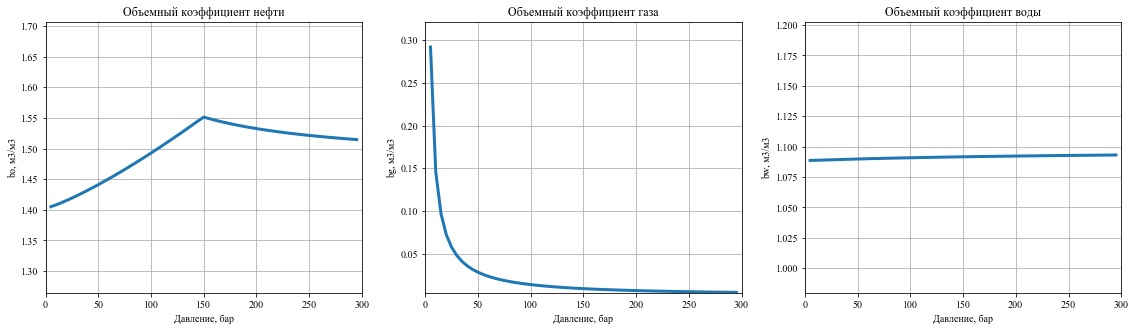

In [5]:
ys = [bo, bg, bw ]
x = [p_n]
titles = ['Объемный коэффициент нефти','Объемный коэффициент газа', 'Объемный коэффициент воды']
ylabels = ['bo, м3/м3', 'bg, м3/м3' , 'bw, м3/м3']
subplots = [131,132,133]
plot3inrow(ys, x, titles, ylabels, subplots)

## Вязкости нефти, газа и воды

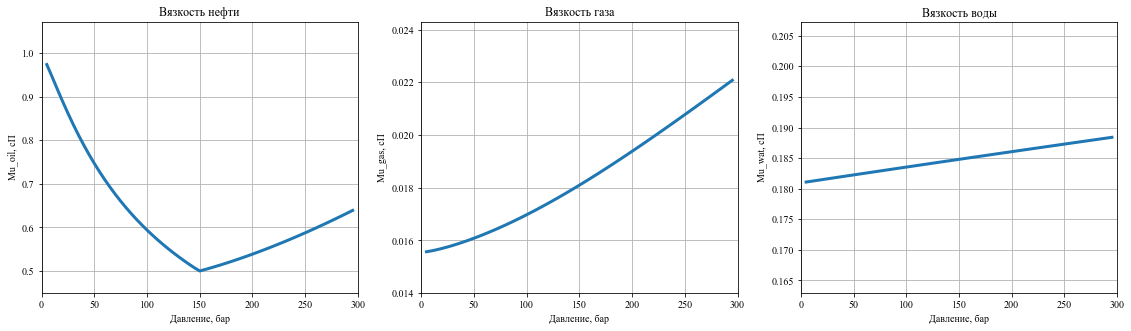

In [6]:
ys = [mu_oil, mu_gas, mu_wat ]
x = [p_n]
titles = ['Вязкость нефти','Вязкость газа', 'Вязкость воды']
ylabels = ['Mu_oil, сП', 'Mu_gas, сП' , 'Mu_wat, сП']
subplots = [131,132,133]
plot3inrow(ys, x, titles, ylabels, subplots)

## Плотности нефти, газа и воды

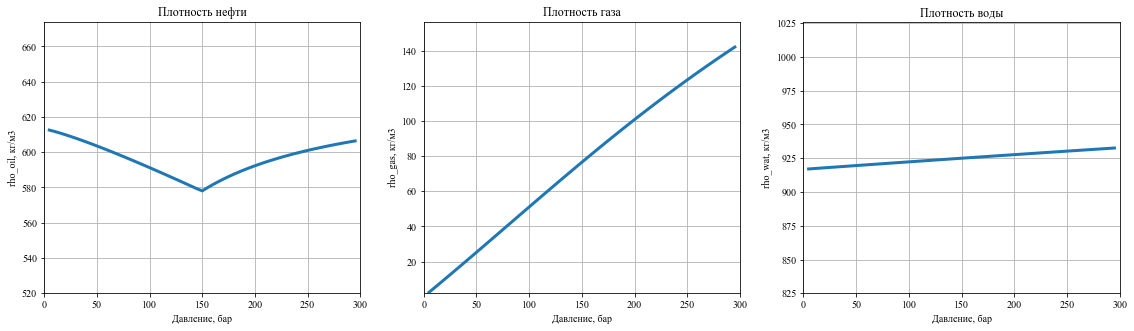

In [7]:
ys = [rho_oil, rho_gas, rho_wat ]
x = [p_n]
titles = ['Плотность нефти','Плотность газа',  'Плотность воды']
ylabels = ['rho_oil, кг/м3', 'rho_gas, кг/м3' , 'rho_wat, кг/м3']
subplots = [131,132,133]
plot3inrow(ys, x, titles, ylabels, subplots)

## Сжимаемости нефти, газа и воды

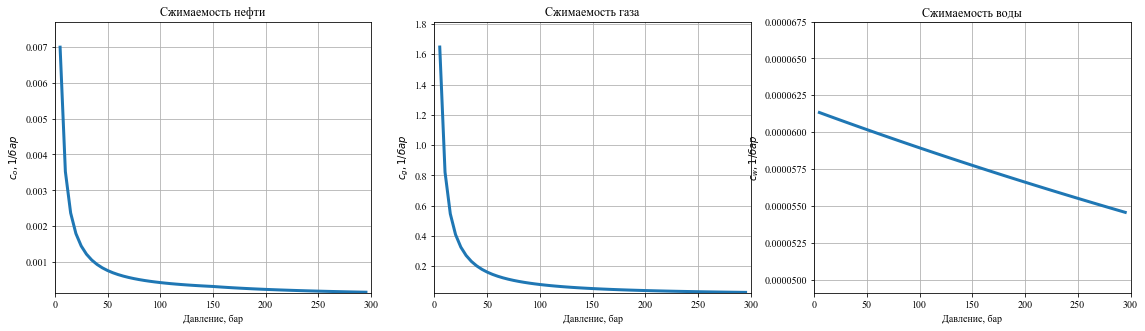

In [9]:
ys = [compr_oil, compr_gas, compr_wat ]
x = [p_n]
titles = ['Сжимаемость нефти','Сжимаемость газа',  'Сжимаемость воды']
ylabels = ['$c_o, 1/бар$', '$c_g, 1/бар$' , '$c_w, 1/бар$']
subplots = [131,132,133]
plot3inrow(ys, x, titles, ylabels, subplots)